In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [84]:
df = pd.read_csv(r'C:\Users\2005h\Downloads\archive (1)\Titanic-Dataset.csv',encoding= 'unicode_escape')

In [85]:
df.shape

(891, 12)

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### check for null values

In [88]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling the missing values

In [89]:
#drop the "cabin" column from the dataframe
df = df.drop(columns='Cabin', axis=1)

In [90]:
# replacing the missing values in "Age" column with mean value
mean_age = df['Age'].mean()
df.fillna({'Age': mean_age}, inplace=True)

In [91]:
# finding the mode value of "Embarked" column
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [92]:
print(df['Embarked'].mode()[0])

S


In [93]:
# replacing the missing values in "Embarked" column with mode value
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)

In [94]:
# check the number of missing values in each column
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [95]:
df.shape

(891, 11)

In [96]:
df['Age'] = df['Age'].astype('int')
df['Fare'] = df['Fare'].astype('int')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    object
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


In [98]:
df['Age'].dtypes

dtype('int64')

In [99]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Data Analysis

In [100]:
# getting some statistical measures about the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.544332,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,13.013778,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


In [102]:
# finding the number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

#  Expolatory Data Analysis

#### Here we visualise the count of survivors


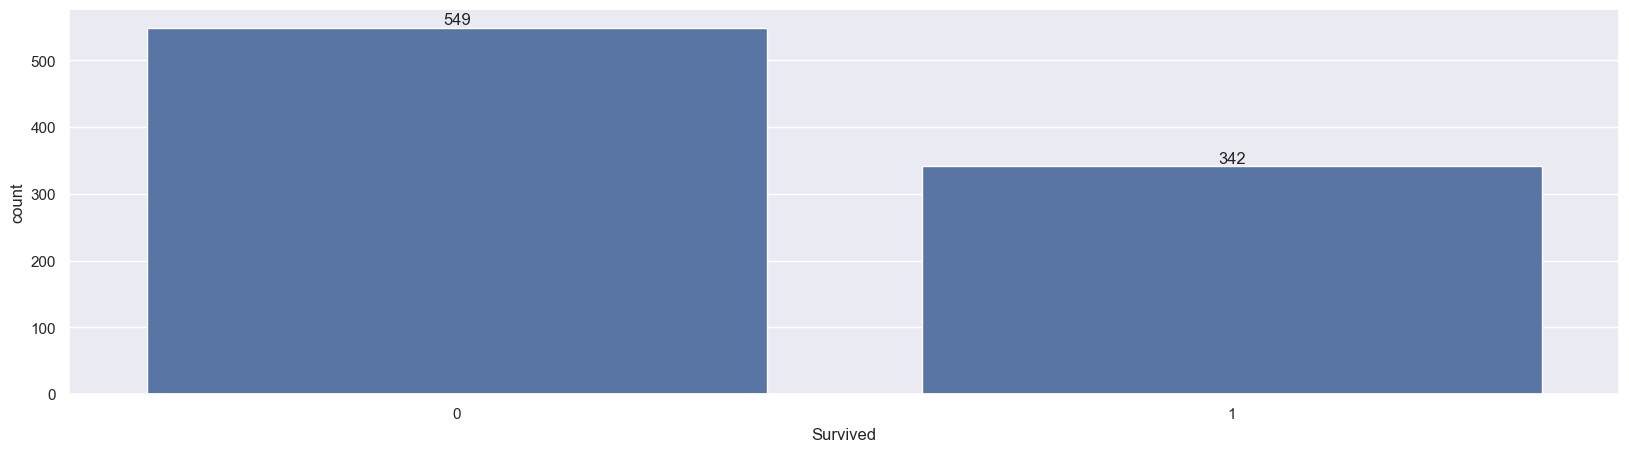

In [119]:
ax= sns.countplot(x='Survived', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

#### Here we visualize the count of survivors wrt pclass

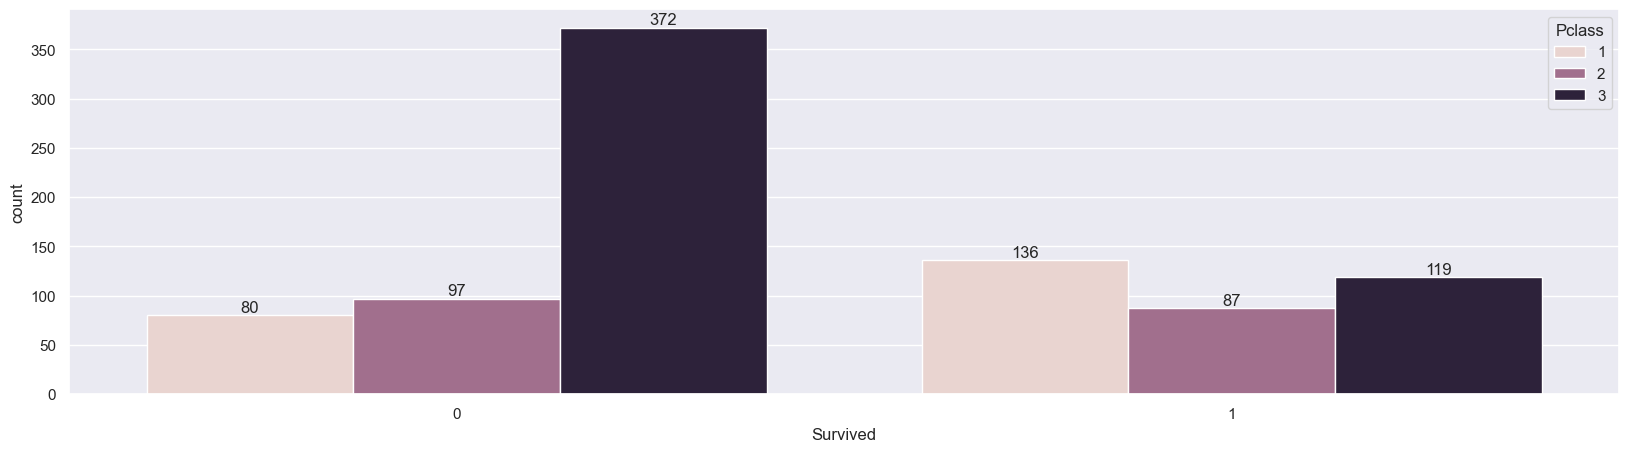

In [120]:
ax= sns.countplot(x=df['Survived'], hue=df['Pclass'])
for bars in ax.containers:
    ax.bar_label(bars)

In [106]:
df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

#### Here we visualize the count of survivors wrt Gender

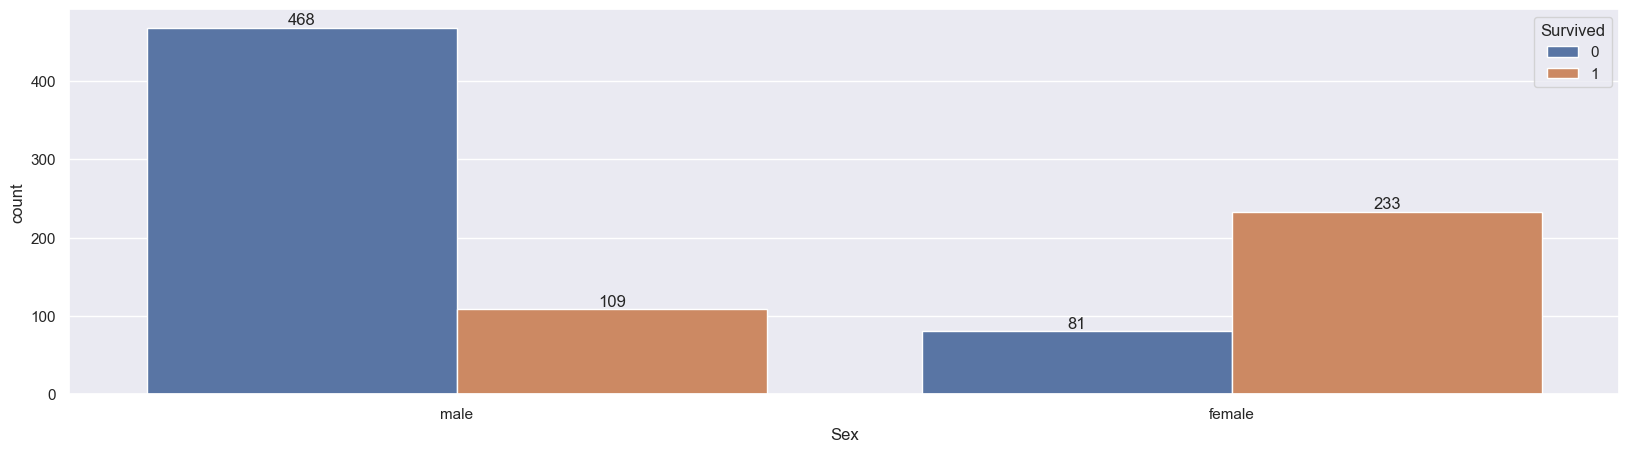

In [121]:
ax= sns.countplot(x=df['Sex'], hue= df['Survived'])
for bars in ax.containers:
    ax.bar_label(bars)

## Have a look on survivors rate by sex

In [108]:
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


#### Here we visualize the survivors rate by sex

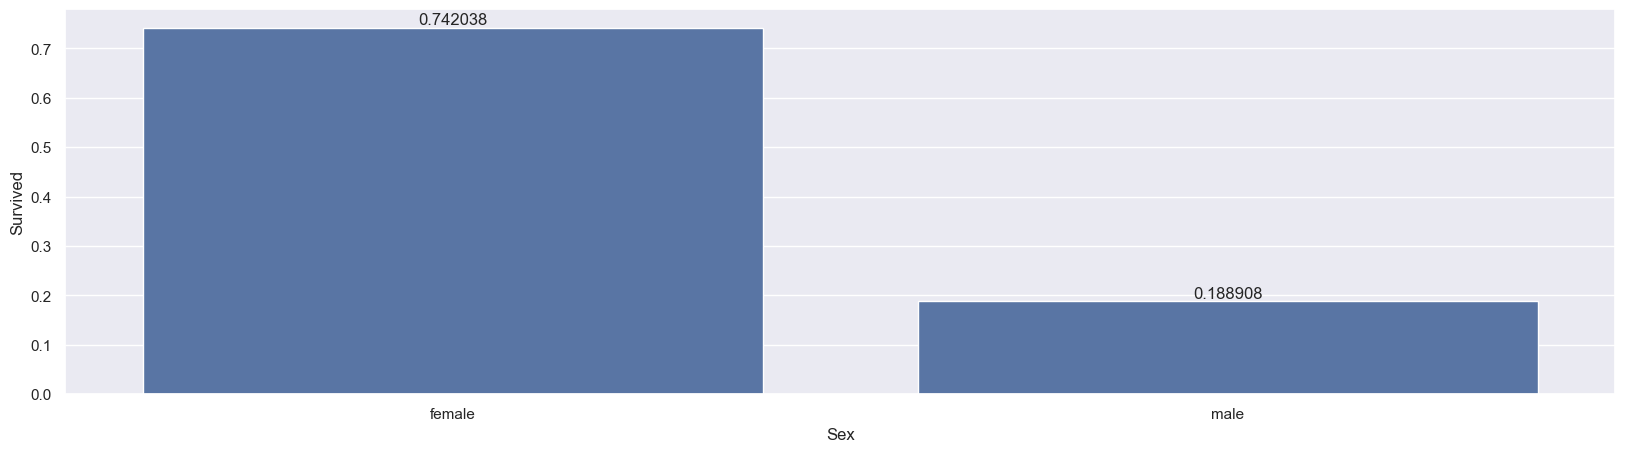

In [122]:
survived_sex= df.groupby('Sex')[['Survived']].mean()
ax= sns.barplot(x='Sex', y= 'Survived' , data =survived_sex)

for bars in ax.containers:
    ax.bar_label(bars)

#### Encoding the Categorical Columns

In [125]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [126]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

### Separating features & Target

In [128]:
X = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = df['Survived']

In [129]:
print(X)

     Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         3    0   22      1      0     7         0
1         1    1   38      1      0    71         1
2         3    1   26      0      0     7         0
3         1    1   35      1      0    53         0
4         3    0   35      0      0     8         0
..      ...  ...  ...    ...    ...   ...       ...
886       2    0   27      0      0    13         0
887       1    1   19      0      0    30         0
888       3    1   29      1      2    23         0
889       1    0   26      0      0    30         1
890       3    0   32      0      0     7         2

[891 rows x 7 columns]


In [130]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#### Splitting the data into training data & Test data

In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [132]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [143]:
print(Y.shape, Y_train.shape, Y_test.shape)


(891,) (712,) (179,)


#### Model Training

#### Logistic Regression

In [145]:
model = LogisticRegression()

In [146]:
# training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\2005h\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

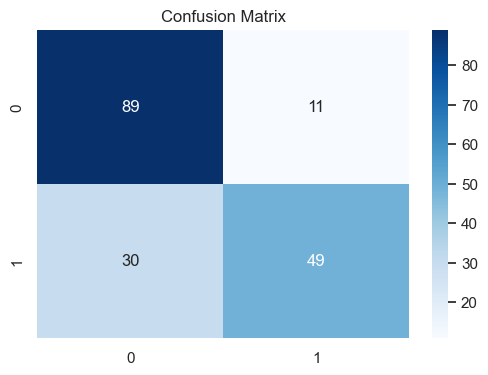

In [153]:
# Confusion matrix

conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [154]:
# Classification Report
print("Classification Report:\n", classification_report(Y_test,X_test_prediction ))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81       100
           1       0.82      0.62      0.71        79

    accuracy                           0.77       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.77      0.77       179



#### Model Evaluation

#### Accuracy Score

In [137]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [138]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 

In [139]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8117977528089888


In [140]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [141]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [155]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.770949720670391
